In [1]:
using Gadfly

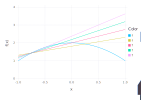

In [2]:
f(x) = 2 - x^2
c = -0.75
sec_line(h) = x -> f(c) + (f(c + h) - f(c)) / h * (x - c)
plot([f, sec_line(1), sec_line(.75), sec_line(.5), sec_line(.25)], -1, 1)

In [3]:
f(x) = x^2 - 2x; fp(x) = 2x - 2
h = .001
c = 3
(f(c + h) - f(c)) / h

4.000999999999699

In [4]:
( (f(c + h) - f(c)) / h ) - fp(c)

0.0009999999996992415

In [5]:
f(x) = sin(x); fp(x) = cos(x)
c = pi/4; h = 0.0001
( f(c + h) - f(c) )/h - fp(c)

-3.535651724428934e-5

In [6]:
fp_p(x) = (f(x+h) - f(x)) / h

fp_p (generic function with 1 method)

In [7]:
fp_p(c) - fp(c)

-3.535651724428934e-5

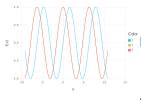

In [8]:
plot([f, fp_p, cos], c - 10, c + 10)

In [9]:
forward_difference(f, x0, h) = (f(x0 + h) - f(x0)) / h

forward_difference (generic function with 1 method)

In [10]:
Df(f; h=1e-8) = x -> forward_difference(f,x,h)

Df (generic function with 1 method)

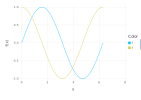

In [11]:
f(x) = sin(x)
fp(x) = Df(f)(x)
plot([f,fp], 0, 2pi)

In [12]:
?exp

search: 

```
exp(x)
```

Compute $e^x$.


exp expm exp2 Expr expm1 exp10 export expand exponent expanduser ldexp



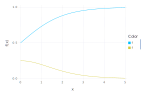

In [13]:
f(x) = exp(x) / (1 + exp(x))
plot([f, Df(f)], 0, 5)

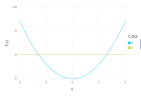

In [14]:
f(x) = x^3 - 5x + 4
fp(x) = Df(f)(x)
plot([fp, x->0], -2, 2)

In [15]:
using Roots

In [16]:
roots(fp)

2-element Array{Float64,1}:
  1.29099
 -1.29099

In [17]:
f(x) = cosd(x)
fp(x) = Df(f)(x)

fp (generic function with 1 method)

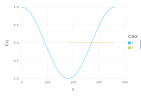

In [18]:
plot([f, x->fp(x) > 0 ? 0 : NaN], 0, 360)

In [19]:
f(x) = sin(x)
fp(x) = cos(x)
[Df(f,h=h)(.5) - fp(.5) for h = [.1, .01, .001, .0001, .00001]]

5-element Array{Any,1}:
 -0.0254132  
 -0.00241173 
 -0.000239859
 -2.39727e-5 
 -2.39715e-6 

In [20]:
hs = [(1/10)^i for i in 1:16]
out = [Df(f,h=h)(.5) - fp(.5) for h in hs]
[hs out]

16x2 Array{Any,2}:
 0.1      -0.0254132  
 0.01     -0.00241173 
 0.001    -0.000239859
 0.0001   -2.39727e-5 
 1.0e-5   -2.39715e-6 
 1.0e-6   -2.3969e-7  
 1.0e-7   -2.4695e-8  
 1.0e-8    2.85032e-10
 1.0e-9   -5.52261e-8 
 1.0e-10  -1.10737e-7 
 1.0e-11  -1.22096e-6 
 1.0e-12  -6.77208e-6 
 1.0e-13   4.87391e-5 
 1.0e-14  -0.000506372
 1.0e-15   0.0105959  
 1.0e-16   0.23264    

In [21]:
central_difference(f, x0, h) = (f(x0 + h) - f(x0 - h)) / (2h)
Dc(f;h=0.0001) = x->central_difference(f, x, h)

Dc (generic function with 1 method)

In [22]:
f(x) = sin(x)
fp(x) = cos(x)
using_D = [Df(f,h=h)(.5) - fp(.5) for h in hs]
using_Dc = [Dc(f,h=h)(.5) - fp(.5) for h in hs]
[hs using_D using_Dc]

16x3 Array{Any,2}:
 0.1      -0.0254132    -0.00146191 
 0.01     -0.00241173   -1.46263e-5 
 0.001    -0.000239859  -1.46264e-7 
 0.0001   -2.39727e-5   -1.46274e-9 
 1.0e-5   -2.39715e-6   -1.75036e-11
 1.0e-6   -2.3969e-7     7.47635e-12
 1.0e-7   -2.4695e-8    -2.70079e-10
 1.0e-8    2.85032e-10   2.85032e-10
 1.0e-9   -5.52261e-8    2.85032e-10
 1.0e-10  -1.10737e-7   -1.10737e-7 
 1.0e-11  -1.22096e-6   -1.22096e-6 
 1.0e-12  -6.77208e-6   -6.77208e-6 
 1.0e-13   4.87391e-5    4.87391e-5 
 1.0e-14  -0.000506372  -0.000506372
 1.0e-15   0.0105959     0.0105959  
 1.0e-16   0.23264       0.23264    

In [23]:
f(x) = 10/(1+x^2) - 10*exp(-(1/2)*x^2)
fp(x) = Dc(f)(x)
intersection_point(c) = c - f(c)/fp(c)

intersection_point (generic function with 1 method)

In [24]:
c = 1
intersection_point(c)

2.000000018978514

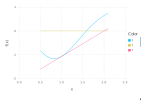

In [25]:
plot([f, x->0, x->f(c) + fp(c)*(x - c)], .5, 2.1)

In [26]:
f(x) = besselj(1, x)
fp(x) = Dc(f)(x)

fp (generic function with 1 method)

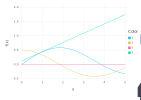

In [27]:
plot([f, fp, x->0, x->f(c) + fp(c) * (x - c)], 0, 5)

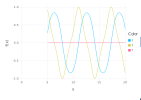

In [28]:
f(x) = sin(cos(x))
fp(x) = Dc(f)(x)
plot([f,fp, x->0], 5, 20)

In [29]:
intersection_point(f, c) = c - f(c)/Dc(f)(c)

intersection_point (generic function with 2 methods)

In [30]:
f(x) = besselj(1,x)
fp(x) = Dc(f)(x)

fp (generic function with 1 method)

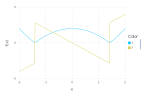

In [31]:
f(x) = abs(x^2 - 2)
fp(x) = Dc(f)(x)
plot([f, fp], -2, 2)

In [32]:
f(x) = sin(x)
fp(x) = D(f)(x)
fp(pi)

-1.0

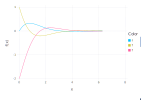

In [33]:
f(x) = exp(-x)*sin(x)
plot([f,D(f), D2(f)], 0, 2pi)

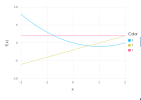

In [34]:
f(x) = x^2 - 2x
plot([f, D(f), D2(f)], -2, 2)

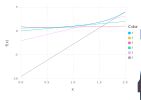

In [35]:
tangent(f, c) = x -> f(c) + D(f)(c)*(x - c)
f(x) = x ^ x
c = 0.5
pts = [0]
plot([f ;[tangent(f,c) for c in range(0,0.5,5)]], 0, 2)

In [36]:
A(t) = 6.687(0.931)^t

A (generic function with 1 method)

In [37]:
m = (A(30) - A(0)) / (30 - 0)

-0.1968024043540685

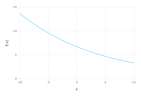

In [38]:
plot(A, -10, 10)

In [39]:
D(A)(15)

-0.1635905803884566

In [40]:
fzero(x -> D(A)(x) - m, [0, 30])

12.414773526372592

In [41]:
# skipping ahead
a, err = quadgk(A, 0, 30)
avg = a/(30 - 0)
fzero(t -> A(t) - avg, [0, 30])

12.414773526372596

In [42]:
L(t) = A(30) + D(A)(30) * (t - 30)

L (generic function with 1 method)

In [43]:
L(30), L(100)

(0.7829278693779448,-3.135406990501517)

In [44]:
fzero(t -> L(t) - 0.5, [30, 100])

35.054430405946825

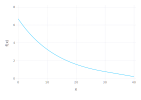

In [45]:
f(t) = t <= 30 ? A(t) : L(t)
plot(f, 0, 40)

In [46]:
# question 2
f(x) = (10 / (1 + x^2)) - 10 * exp(-(1/2)*x^2)
c = 1
intersection_point(f,c) = c - f(c) / D(f)(c)

intersection_point (generic function with 2 methods)

In [47]:
intersection_point(f,c)

2.0

In [48]:
f(x) = exp(-x)*sin(x)
fp(x) = exp(-x)*(cos(x) - sin(x))
[abs(D(f)(x) - fp(x)) for x in linspace(0,pi,25)]

25-element Array{Any,1}:
 0.0        
 0.0        
 0.0        
 0.0        
 0.0        
 1.38778e-17
 4.89185e-18
 0.0        
 2.77556e-17
 2.77556e-17
 0.0        
 0.0        
 2.77556e-17
 2.77556e-17
 0.0        
 2.77556e-17
 2.77556e-17
 0.0        
 2.77556e-17
 1.38778e-17
 0.0        
 1.38778e-17
 0.0        
 0.0        
 0.0        

In [49]:
eps()

2.220446049250313e-16

In [50]:
?eps

search: 

```
eps(::DateTime) -> Millisecond
eps(::Date) -> Day
```

Returns `Millisecond(1)` for `DateTime` values and `Day(1)` for `Date` values.

```
eps(x)
```

The distance between `x` and the next larger representable floating-point value of the same `DataType` as `x`.

```
eps(T)
```

The distance between 1.0 and the next larger representable floating-point value of `DataType` `T`. Only floating-point types are sensible arguments.

```
eps()
```

The distance between 1.0 and the next larger representable floating-point value of `Float64`.


eps RepString @elapsed indexpids expanduser escape_string peakflops

